# Applied Machine Learning 

### Question 1 - 
#### Implement a Linear Regression model in Machine Learning and fit the model to predict total vaccination by 15-Mar-2021 for India country. Use “country_vaccinations” dataset.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import datetime

In [2]:
# import dataset

dataset = pd.read_csv('country_vaccinations.csv')
dataset

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,Zimbabwe,ZWE,2021-02-23,4041.0,4041.0,NaN,2727.0,808.0,0.03,0.03,NaN,54.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1365740267...
4431,Zimbabwe,ZWE,2021-02-24,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1365740267...
4432,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1365740267...
4433,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1365740267...


In [3]:
# Filter data for India

country = ['India']
dataset = dataset.loc[dataset['country'].isin(country)]
dataset = dataset[["date", "total_vaccinations"]]
dataset

,date,total_vaccinations
1891,2021-01-15,0.0
1892,2021-01-16,191181.0
1893,2021-01-17,224301.0
1894,2021-01-18,454049.0
1895,2021-01-19,674835.0
1896,2021-01-20,806484.0
1897,2021-01-21,1043534.0
1898,2021-01-22,1390592.0
1899,2021-01-23,1582201.0
1900,2021-01-24,1615504.0


In [4]:
# Check Null Values

dataset['total_vaccinations'].isnull().sum()

1

In [5]:
# Drop Null Values

dataset = dataset.dropna()
dataset

,date,total_vaccinations
1891,2021-01-15,0.0
1892,2021-01-16,191181.0
1893,2021-01-17,224301.0
1894,2021-01-18,454049.0
1895,2021-01-19,674835.0
1896,2021-01-20,806484.0
1897,2021-01-21,1043534.0
1898,2021-01-22,1390592.0
1899,2021-01-23,1582201.0
1900,2021-01-24,1615504.0


In [6]:
# Check Null Values Again

dataset['total_vaccinations'].isnull().sum()

0

In [7]:
# Check Dataset Info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1891 to 1934
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                43 non-null     object 
 1   total_vaccinations  43 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [8]:
# Convert Date to Ordinal

import datetime
dataset['date'] = pd.to_datetime(dataset.date)
dataset['date'] = dataset['date'].map(datetime.datetime.toordinal)
dataset

C:\Users\kumar\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\kumar\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,total_vaccinations
1891,737805,0.0
1892,737806,191181.0
1893,737807,224301.0
1894,737808,454049.0
1895,737809,674835.0
1896,737810,806484.0
1897,737811,1043534.0
1898,737812,1390592.0
1899,737813,1582201.0
1900,737814,1615504.0


In [9]:
# Split Independent and Dependent Variable

X = dataset.iloc[:, [0]].values # Date (Independent variable)
y = dataset.iloc[:,[1]].values # Total Vaccinations (Dependent Variable)

In [10]:
# Mean X and Y

mean_x = np.mean(X)
mean_y = np.mean(y)

In [11]:
# Total number of values
n = len(X)

In [12]:
# Using the formula to calculate m and c
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

In [13]:
# Print coefficients
print(m, c)

[326195.65997363] [-2.40669882e+11]


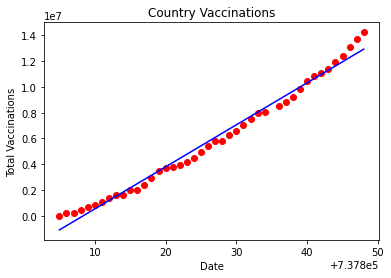

In [14]:
# plot the actual data points of training set
plt.scatter(X, y, color = 'red')
y=m*X+c
# plot the regression line
plt.plot(X, y, color='blue')
plt.title('Country Vaccinations')
plt.xlabel('Date') #independent variable
plt.ylabel('Total Vaccinations') #dependent variable
plt.show()

In [15]:
# Split data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [16]:
# Fit Simple Linear Regression to Training Data

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #we are creating object of the linearregression cl
regressor.fit(X_train, y_train) # we are fitting the model by training data

LinearRegression()

In [17]:
# Make Prediction

y_pred = regressor.predict(X_test)

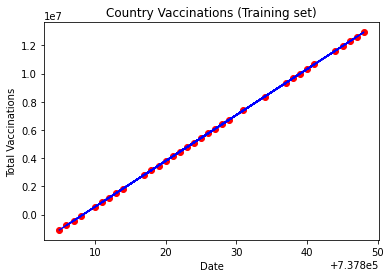

In [18]:
# Visualize training set results

# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Country Vaccinations (Training set)')
plt.xlabel('Date') #independent variable
plt.ylabel('Total Vaccinations') #dependent variable
plt.show()

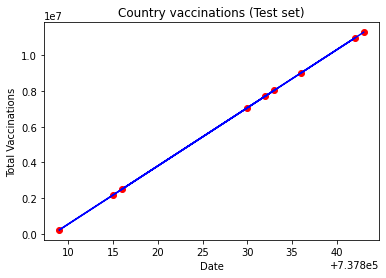

In [19]:
# Visualize test set results

# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.title('Country vaccinations (Test set)')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.show()

In [20]:
# Make new prediction

total_vaccinations_pred = regressor.predict([[737864]]) # Value of 27th Feb + 16
print('Total Vaccinations on 15th March 2021 for India is: ',total_vaccinations_pred)

Total Vaccinations on 15th March 2021 for India is:  [[18152261.67019653]]


In [21]:
# printing values

print('Slope:' ,regressor.coef_)
print('Intercept:', regressor.intercept_)

Slope: [[326195.65997392]]
Intercept: [-2.40669882e+11]


In [22]:
#Finding Residuals or errors

print ('MSE:',metrics.mean_squared_error(y_test,y_pred))
print ('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE: 1.034802860683865e-10
MAE: 3.3908420138888887e-06
RMSE: 1.0172526041666666e-05
